In [98]:
pip install pandas numpy statsmodels scikit-learn seaborn dash plotly

Note: you may need to restart the kernel to use updated packages.


In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import plotly.express as px
import dash
import statsmodels.api as sm
import statsmodels.formula.api as smf

from dash import dcc, html
from dash.dependencies import Input, Output
from fixedeffect.iv import iv2sls, ivgmm, ivtest
from fixedeffect.fe import fixedeffect, did, getfe
from fixedeffect.utils.panel_dgp import gen_data
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [100]:
# Uploading the dataset
happinessdata = pd.read_excel('/Users/julienjcg/Dropbox/MSc SIA/Programming/Python Project/DataHappiness.xlsx')

# Displaying the dataset
display(happinessdata)

,Country,Year,HappinessScore,PerCapitaGDP,LifeExpectancy,SocialSupport,Freedom,Corruption,AirPollution,GenderInequality
0,Afghanistan,2015,3.5750,594.213,62.659,0.302850,0.234140,0.097190,73.490818,0.692
1,Afghanistan,2016,3.3600,520.267,63.136,0.110370,0.164300,0.071120,72.765910,0.688
2,Afghanistan,2017,3.7940,529.773,63.016,0.581543,0.106180,0.061158,65.862347,0.681
3,Afghanistan,2018,3.6320,499.799,63.081,0.537000,0.085000,0.036000,67.227177,0.678
4,Afghanistan,2019,3.2030,499.762,63.565,0.517000,0.000000,0.025000,58.330872,0.676
...,...,...,...,...,...,...,...,...,...,...
709,Vietnam,2016,5.0610,2720.168,73.938,0.791170,0.559540,0.115560,20.330446,0.380
710,Vietnam,2017,5.0740,2957.899,73.963,1.277491,0.571056,0.087633,18.579780,0.384
711,Vietnam,2018,5.1030,3216.254,73.976,1.365000,0.618000,0.079000,20.163018,0.389
712,Vietnam,2019,5.1750,3439.102,74.093,1.346000,0.543000,0.073000,20.831787,0.391


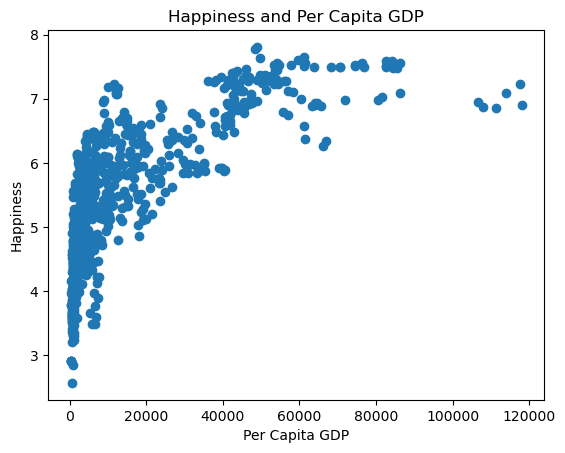

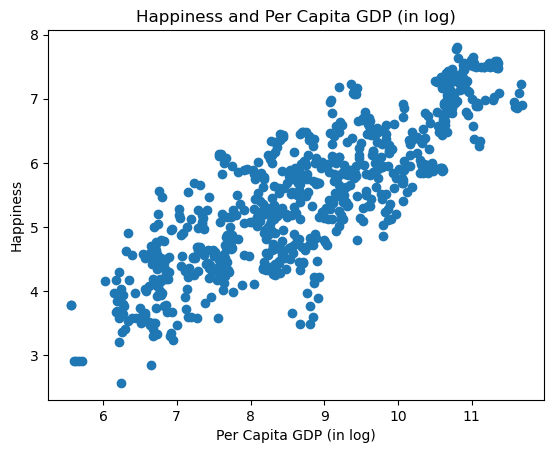

In [101]:
# Relationship between Happiness and Per Capita GDP
plt.figure(1)
plt.scatter('PerCapitaGDP', 'HappinessScore', data=happinessdata)
plt.xlabel('Per Capita GDP')
plt.ylabel('Happiness')
plt.title('Happiness and Per Capita GDP')
plt.show()

# Creating a new column which is a log transformation of PerCapitaGDP
happinessdata['LogPerCapitaGDP'] = np.log(happinessdata['PerCapitaGDP'])

# Relationship between Happiness and Per Capita GDP (in log)
plt.figure(2)
plt.scatter('LogPerCapitaGDP', 'HappinessScore', data=happinessdata)
plt.xlabel('Per Capita GDP (in log)')
plt.ylabel('Happiness')
plt.title('Happiness and Per Capita GDP (in log)')
plt.show()

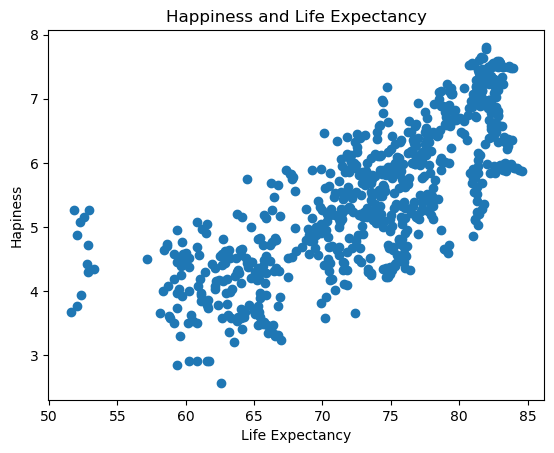

In [102]:
# Relationship between Happiness and Life Expectancy
plt.scatter('LifeExpectancy', 'HappinessScore', data=happinessdata)
plt.xlabel('Life Expectancy')
plt.ylabel('Hapiness')
plt.title('Happiness and Life Expectancy')
plt.show()

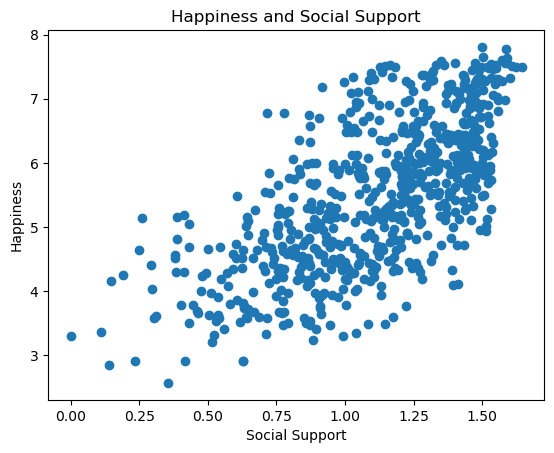

In [103]:
# Relationship between Happiness and Social Support
plt.scatter('SocialSupport', 'HappinessScore', data=happinessdata)
plt.xlabel('Social Support')
plt.ylabel('Happiness')
plt.title('Happiness and Social Support')
plt.show()

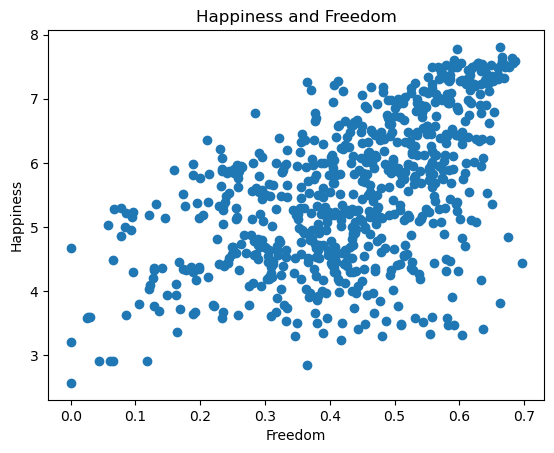

In [104]:
# Relationship between Happiness and Freedom
plt.scatter('Freedom', 'HappinessScore', data=happinessdata)
plt.xlabel('Freedom')
plt.ylabel('Happiness')
plt.title('Happiness and Freedom')
plt.show()

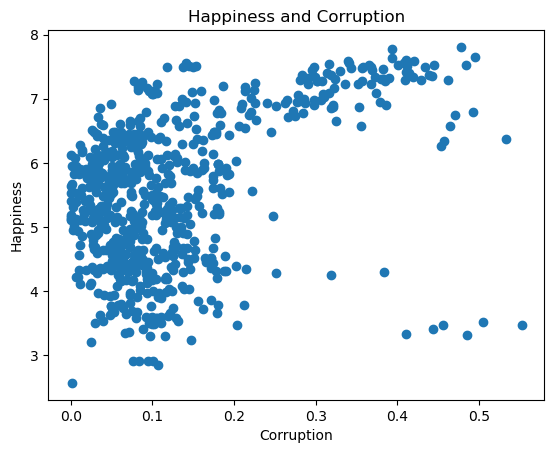

In [105]:
# Relationship between Happiness and Corruption
plt.scatter('Corruption', 'HappinessScore', data=happinessdata)
plt.xlabel('Corruption')
plt.ylabel('Happiness')
plt.title('Happiness and Corruption')
plt.show()

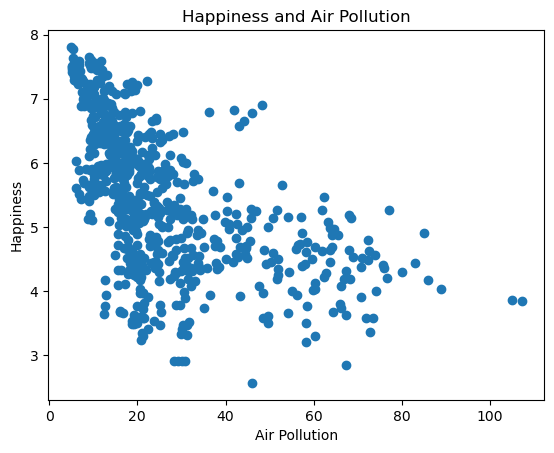

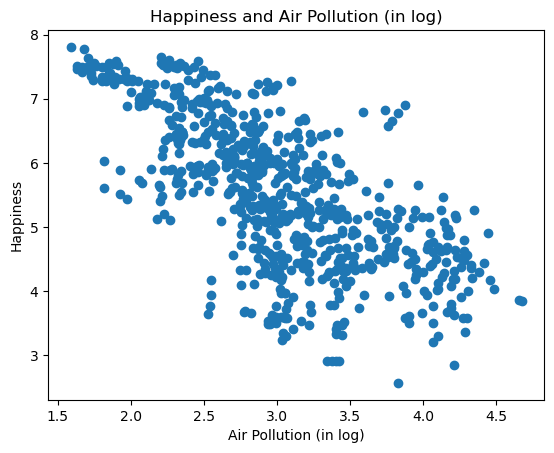

In [106]:
# Relationship between Happiness and Air Pollution
plt.figure(1)
plt.scatter('AirPollution', 'HappinessScore', data=happinessdata)
plt.xlabel('Air Pollution')
plt.ylabel('Happiness')
plt.title('Happiness and Air Pollution')
plt.show()

# Creating a new column which is a log transformation of AirPollution
happinessdata['LogAirPollution'] = np.log(happinessdata['AirPollution'])

# Relationship between Happiness and Air Pollution (in log)
plt.figure(2)
plt.scatter('LogAirPollution', 'HappinessScore', data=happinessdata)
plt.xlabel('Air Pollution (in log)')
plt.ylabel('Happiness')
plt.title('Happiness and Air Pollution (in log)')
plt.show()

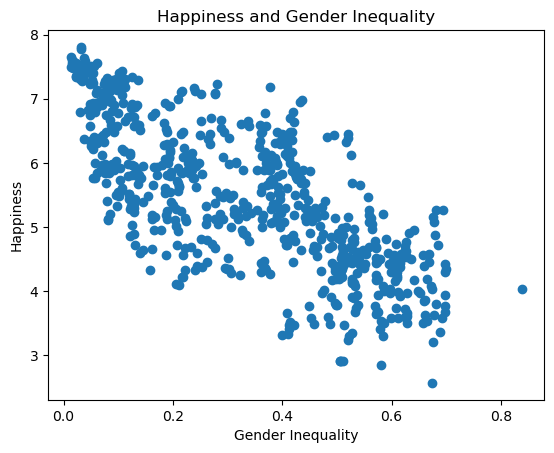

In [107]:
# Relationship between Happiness and Gender Inequality
plt.scatter('GenderInequality', 'HappinessScore', data=happinessdata)
plt.xlabel('Gender Inequality')
plt.ylabel('Happiness')
plt.title('Happiness and Gender Inequality')
plt.show()

In [108]:
# First panel fixed effects regression model
model1 = smf.ols(
    formula = "HappinessScore ~ LogPerCapitaGDP + LifeExpectancy + SocialSupport + Freedom + Corruption + LogAirPollution + GenderInequality + C(Country)",
    data = happinessdata
).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     118.3
Date:                Fri, 07 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:22:17   Log-Likelihood:                 56.422
No. Observations:                 714   AIC:                             139.2
Df Residuals:                     588   BIC:                             715.1
Df Model:                         125                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                2.3805      1.405      1.694      0.091      -0.379       5.140
C(Country)[T.Albania]                    0.5545      0.468      1.185      0.236      -0.364       1.473
C(Country)[T.Algeria]                    1.1833      0.337      3.516      0.000       0.522       1.844
C(Country)[T.Argentina]                  1.3195      0.436      3.025      0.003       0.463       2.176
C(Country)[T.Armenia]                    0.4994      0.375      1.331      0.184      -0.238       1.236
C(Country)[T.Australia]                  1.4781      0.653      2.263      0.024       0.195       2.761
C(Country)[T.Austria]                    1.7299      0.634      2.728      0.007       0.484       2.975
C(Country)[T.Azerbaijan]                 0.7737      0.349      2.215      0.027       0.088       1.460
C(Country)[T.Bangladesh]                 0.7515      0.254      2.956      0.003       0.252       1.251
C(Country)[T.Belarus]                    1.1548      0.457      2.528      0.012       0.258       2.052
C(Country)[T.Belgium]                    1.5362      0.632      2.430      0.015       0.294       2.778
C(Country)[T.Bolivia]                    1.3405      0.285      4.698      0.000       0.780       1.901
C(Country)[T.Bosnia and Herzegovina]     1.2913      0.439      2.939      0.003       0.428       2.154
C(Country)[T.Botswana]                  -1.1701      0.334     -3.499      0.001      -1.827      -0.513
C(Country)[T.Brazil]                     1.4292      0.395      3.623      0.000       0.654       2.204
C(Country)[T.Bulgaria]                   0.1266      0.428      0.296      0.768      -0.714       0.968
C(Country)[T.Burkina Faso]               0.5722      0.172      3.322      0.001       0.234       0.910
C(Country)[T.Burundi]                   -0.0957      0.224     -0.427      0.669      -0.536       0.344
C(Country)[T.Cambodia]                  -0.0471      0.272     -0.173      0.863      -0.582       0.488
C(Country)[T.Cameroon]                   0.7329      0.206      3.562      0.000       0.329       1.137
C(Country)[T.Canada]                     1.5439      0.643      2.402      0.017       0.282       2.806
C(Country)[T.Chad]                       0.1863      0.257      0.726      0.468      -0.318       0.690
C(Country)[T.Chile]                      1.8159      0.479      3.794      0.000       0.876       2.756
C(Country)[T.China]                      1.0060      0.464      2.167      0.031       0.094       1.918
C(Country)[T.Colombia]                   1.4473      0.372      3.886      0.000       0.716       2.179
C(Country)[T.Congo]                      0.0757      0.236      0.320      0.749      -0.389       0.540
C(Country)[T.Costa Rica]              

In [109]:
# Calculating VIF to check multicollinearity
vif_data = pd.DataFrame()
vif_data["Variable"] = ["LogPerCapitaGDP", "LifeExpectancy", "SocialSupport", "Freedom", "Corruption", "LogAirPollution", "GenderInequality"]
vif_data["VIF"] = [variance_inflation_factor(happinessdata[["LogPerCapitaGDP", "LifeExpectancy", "SocialSupport", "Freedom", "Corruption", "LogAirPollution", "GenderInequality"]].values, i) for i in range(len(["LogPerCapitaGDP", "LifeExpectancy", "SocialSupport", "Freedom", "Corruption", "LogAirPollution", "GenderInequality"]))]
print("Variance Inflation Factor (VIF):\n", vif_data)

Variance Inflation Factor (VIF):
            Variable         VIF
0   LogPerCapitaGDP  238.404080
1    LifeExpectancy  282.335841
2     SocialSupport   28.591570
3           Freedom   16.174357
4        Corruption    3.517173
5   LogAirPollution   48.342887
6  GenderInequality   11.035574


In [110]:
# Define explanatory variables (Corruption is excluded for PCA)
explanatory_vars = ["LogPerCapitaGDP", "LifeExpectancy", "SocialSupport", "Freedom", "LogAirPollution", "GenderInequality"]

# Standardize data before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(happinessdata[explanatory_vars])

# Perform PCA to reduce multicollinearity
pca = PCA(n_components=2)  # Choosing 2 principal components
principal_components = pca.fit_transform(X_scaled)

# Add PCA components to dataframe
happinessdata["PC1"] = principal_components[:, 0]
happinessdata["PC2"] = principal_components[:, 1]

# Run Fixed Effects Model with PCA components and Corruption
model2 = smf.ols(
    formula = "HappinessScore ~ PC1 + PC2 + Corruption + C(Country)",
    data = happinessdata
).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:         HappinessScore   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     118.4
Date:                Fri, 07 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:22:17   Log-Likelihood:                 43.177
No. Observations:                 714   AIC:                             157.6
Df Residuals:                     592   BIC:                             715.3
Df Model:                         121                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [111]:
# Calculate VIF for PCA components and Corruption
vif_data = pd.DataFrame()
vif_data["Variable"] = ["PC1", "PC2", "Corruption"]
vif_data["VIF"] = [variance_inflation_factor(happinessdata[["PC1", "PC2", "Corruption"]].values, i) for i in range(3)]

print("Variance Inflation Factor (VIF) after PCA:\n", vif_data)

Variance Inflation Factor (VIF) after PCA:
      Variable       VIF
0         PC1  1.088511
1         PC2  1.018298
2  Corruption  1.106809


In [112]:
# List of all parameters for visualization
parameters = ["HappinessScore", "LogPerCapitaGDP", "LifeExpectancy", "SocialSupport", "Freedom", "Corruption", "LogAirPollution", "GenderInequality"]

# Initialization
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Happiness Data Visualization"),
    
    # Dropdown for year selection
    dcc.Dropdown(
        id='year-dropdown',
        options = [{'label': year, 'value': year} for year in sorted(happinessdata['Year'].unique())],
        value = happinessdata['Year'].min(),
        clearable=False
    ),
    
    # Dropdown for selecting parameter
    dcc.Dropdown(
        id='parameter-dropdown',
        options=[{'label': param, 'value': param} for param in parameters],
        value='HappinessScore',
        clearable=False
    ),
    
    # Graph
    dcc.Graph(id='map-plot', style={'height': '100vh'}),
    
    # Display country details
    html.Div(id='country-info', style={'margin-top': '20px', 'font-size': '18px'})
])

# Updating the map
@app.callback(
    Output('map-plot', 'figure'),
    [Input('year-dropdown', 'value'),
     Input('parameter-dropdown', 'value')]
)
def update_map(selected_year, selected_param):
    filtered_happinessdata = happinessdata[happinessdata['Year'] == selected_year]
    
    fig = px.choropleth(
        filtered_happinessdata,
        locations = "Country",
        locationmode = "country names",
        color = selected_param,
        hover_data =parameters,
        title = f"{selected_param} Data for {selected_year}",
        color_continuous_scale = "Viridis"
    )
    
    return fig

# Running the app
if __name__ == '__main__':
    app.run_server(port = 8052, debug=True)
